In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

C:\Users\roysi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading the dataset

df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# shape of the datframe

df.shape

(307511, 122)

In [4]:
# gathering info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Removing unwanted columns from the datset

In [5]:
df.drop(df.loc[:,'WEEKDAY_APPR_PROCESS_START': 'LIVE_CITY_NOT_WORK_CITY'].columns, axis = 1, inplace = True)

In [6]:
df.drop(df.loc[:,'EXT_SOURCE_1': 'AMT_REQ_CREDIT_BUREAU_YEAR'].columns, axis = 1, inplace = True)

In [7]:
df.drop(df.loc[:, 'FLAG_EMP_PHONE': 'FLAG_PHONE'].columns, axis = 1, inplace = True)

In [8]:
df.drop(columns = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE'], inplace = True)

In [9]:
df.shape

(307511, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,1,0,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,1,0,Core staff,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,1,0,Laborers,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,1,0,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,1,0,Core staff,1.0,2,2,Religion


## NULL Value check

In [12]:
df.isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
SK_ID_CURR                          0
NAME_HOUSING_TYPE                   0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
FLAG_EMAIL                          0
FLAG_MOBIL                          0
DAYS_EMPLOYED                       0
DAYS_BIRTH                          0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
TARGET                              0
NAME_INCOME_TYPE                    0
AMT_CREDIT                          0
AMT_INCOME_TOTAL                    0
CNT_CHILDREN                        0
FLAG_OWN_REALTY                     0
FLAG_OWN_CAR                        0
CODE_GENDER                         0
NAME_CONTRACT_TYPE                  0
ORGANIZATION_TYPE                   0
dtype: int64

In [13]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending = False)

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
SK_ID_CURR                      0.000000
NAME_HOUSING_TYPE               0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
FLAG_EMAIL                      0.000000
FLAG_MOBIL                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
TARGET                          0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
ORGANIZATION_TYP

So we will deleting columns which have NULL values above 30%

In [14]:
df.drop(columns = ['OWN_CAR_AGE', 'OCCUPATION_TYPE'], inplace = True)

In [15]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending = False)

AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
SK_ID_CURR                     0.000000
NAME_FAMILY_STATUS             0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REGION_RATING_CLIENT           0.000000
FLAG_EMAIL                     0.000000
FLAG_MOBIL                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
TARGET                         0.000000
AMT_CREDIT                     0.000000
AMT_INCOME_TOTAL               0.000000
CNT_CHILDREN                   0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

- `AMT_GOODS_PRICE`

In [16]:
df[df.AMT_GOODS_PRICE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,1,0,4.0,2,2,Kindergarten
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,1,1,2.0,2,2,Business Entity Type 3
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,1,0,2.0,2,2,Trade: type 7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,1,0,3.0,1,1,Government
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,1,0,1.0,1,1,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-11313,-1470,1,0,4.0,2,2,Business Entity Type 3
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,1,0,3.0,2,2,Self-employed
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,1,0,1.0,2,2,Self-employed
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,1,0,2.0,1,1,Security


In [17]:
df = df[~(df.AMT_GOODS_PRICE.isnull())]

- `AMT_ANNUITY`

In [18]:
df[df.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,1,0,1.0,2,2,Business Entity Type 3
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,1,0,2.0,2,2,Business Entity Type 1
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,1,0,2.0,1,1,Self-employed
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,1,0,2.0,2,2,Government
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,1,0,1.0,1,1,Other
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,1,0,1.0,2,2,Business Entity Type 3
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,1,0,2.0,2,2,Medicine
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,1,1,2.0,2,2,Self-employed
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,1,0,2.0,2,2,Security
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,1,0,2.0,1,1,Business Entity Type 3


In [19]:
df = df[~(df.AMT_ANNUITY.isnull())]

- `CNT_FAM_MEMBERS`

In [20]:
df[df.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE


In [21]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending = False)

SK_ID_CURR                     0.0
NAME_EDUCATION_TYPE            0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
FLAG_EMAIL                     0.0
FLAG_MOBIL                     0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
NAME_HOUSING_TYPE              0.0
NAME_FAMILY_STATUS             0.0
NAME_INCOME_TYPE               0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
AMT_ANNUITY                    0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_CONTRACT_TYPE             0.0
ORGANIZATION_TYPE              0.0
dtype: float64

**Duplicated Value**

In [22]:
df[df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE


No duplicated values found

## Analysing Columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   CNT_CHILDREN                 307221 non-null  int64  
 7   AMT_INCOME_TOTAL             307221 non-null  float64
 8   AMT_CREDIT                   307221 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_INCOME_TYPE             307221 non-null  object 
 12  NAME_EDUCATION_TYPE          307221 non-null  object 
 13 

In [24]:
df.shape

(307221, 23)

In [25]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion


There are two types of data present in the datasheet -
1. Continious Data 
2. Categorical Data

## Analyzing the Categorical Data:

- `TARGET`: Converting the 1: Y and 0: N

In [26]:
df.TARGET.replace([0, 1], ['N', 'Y'], inplace = True)

- `NAME_CONTRACT_TYPE`

In [27]:
(df.NAME_CONTRACT_TYPE.value_counts())/len(df) * 100

Cash loans         90.560216
Revolving loans     9.439784
Name: NAME_CONTRACT_TYPE, dtype: float64

- `CODE_GENDER`

In [28]:
df.CODE_GENDER.value_counts()

F      202251
M      104966
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
# dropping the XNA genders
df = df[~(df.CODE_GENDER == "XNA")]

- `FLAG_OWN_CAR`

In [30]:
df.FLAG_OWN_CAR.value_counts()

N    202635
Y    104582
Name: FLAG_OWN_CAR, dtype: int64

- `FLAG_OWN_REALTY`

In [31]:
df.FLAG_OWN_REALTY.value_counts()

Y    213082
N     94135
Name: FLAG_OWN_REALTY, dtype: int64

- `CNT_CHILDREN`

In [32]:
df.CNT_CHILDREN.value_counts().sort_index()

0     215180
1      61050
2      26723
3       3711
4        427
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

Some people have more than 9 childs, lets view those columns

In [33]:
df[df.CNT_CHILDREN >= 10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
34545,140032,Y,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,927000.0,Working,Secondary / secondary special,Married,House / apartment,-17308,-198,1,0,13.0,2,2,Other
80948,193853,N,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,675000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,14.0,1,1,Kindergarten
132585,253779,N,Cash loans,F,N,Y,10,67500.0,92655.0,5301.0,76500.0,Commercial associate,Higher education,Married,House / apartment,-11458,-742,1,0,12.0,2,2,School
155369,280108,N,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,0,20.0,2,2,Restaurant
171125,298322,N,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13894,-2542,1,0,14.0,1,1,Kindergarten
176011,303956,N,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,891000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,15.0,2,2,Self-employed
183878,313127,N,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,810000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20308,365243,1,0,16.0,2,2,XNA
186820,316580,N,Cash loans,F,N,Y,10,67500.0,117162.0,12559.5,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15052,-1427,1,0,12.0,3,3,Business Entity Type 3
265784,407877,N,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Working,Higher education,Single / not married,House / apartment,-10297,-896,1,0,20.0,2,2,Kindergarten
267998,410527,N,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,540000.0,Working,Secondary / secondary special,Married,House / apartment,-15463,-540,1,0,16.0,2,2,Postal


- `NAME_INCOME_TYPE`

In [34]:
df.NAME_INCOME_TYPE.value_counts()

Working                 158580
Commercial associate     71566
Pensioner                55339
State servant            21677
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

- `NAME_EDUCATION_TYPE`

In [35]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218184
Higher education                  74792
Incomplete higher                 10265
Lower secondary                    3812
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

- `NAME_FAMILY_STATUS`

In [36]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 196255
Single / not married     45383
Civil marriage           29748
Separated                19757
Widow                    16074
Name: NAME_FAMILY_STATUS, dtype: int64

- `NAME_HOUSING_TYPE`

In [37]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272621
With parents            14822
Municipal apartment     11164
Rented apartment         4875
Office apartment         2615
Co-op apartment          1120
Name: NAME_HOUSING_TYPE, dtype: int64

- `REGION_RATING_CLIENT`

In [38]:
df.REGION_RATING_CLIENT.value_counts()

2    226751
3     48290
1     32176
Name: REGION_RATING_CLIENT, dtype: int64

- `REGION_RATING_CLIENT_W_CITY`

In [39]:
df.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229249
3     43822
1     34146
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

- `ORGANIZATION_TYPE`

In [40]:
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
XNA                       55352
Self-employed             38357
Other                     16667
Medicine                  11180
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6871
Construction               6714
Business Entity Type 1     5980
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3275
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transpor

## Data Visualization 

- **`Categorical Data`**

In [41]:
# continious data

df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307217.000000,307217.000000,3.072170e+05,3.072170e+05,307217.000000,3.072170e+05,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000
mean,278171.739591,0.416972,1.688323e+05,5.993189e+05,27120.545473,5.383989e+05,-16038.819388,63851.979829,0.999997,0.056712,2.152619,2.052452,2.031496
std,102788.415252,0.722044,2.372214e+05,4.025214e+05,14492.167839,3.694492e+05,4363.846485,141306.625682,0.001804,0.231293,0.910621,0.509086,0.502789
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,189142.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,-19684.000000,-2760.000000,1.000000,0.000000,2.000000,2.000000,2.000000
50%,278195.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,-15753.000000,-1213.000000,1.000000,0.000000,2.000000,2.000000,2.000000
75%,367127.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12415.000000,-289.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,1.000000,1.000000,20.000000,3.000000,3.000000


In [42]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion


# Univariate Analysis of Categorical Columns

<Figure size 2160x1800 with 0 Axes>

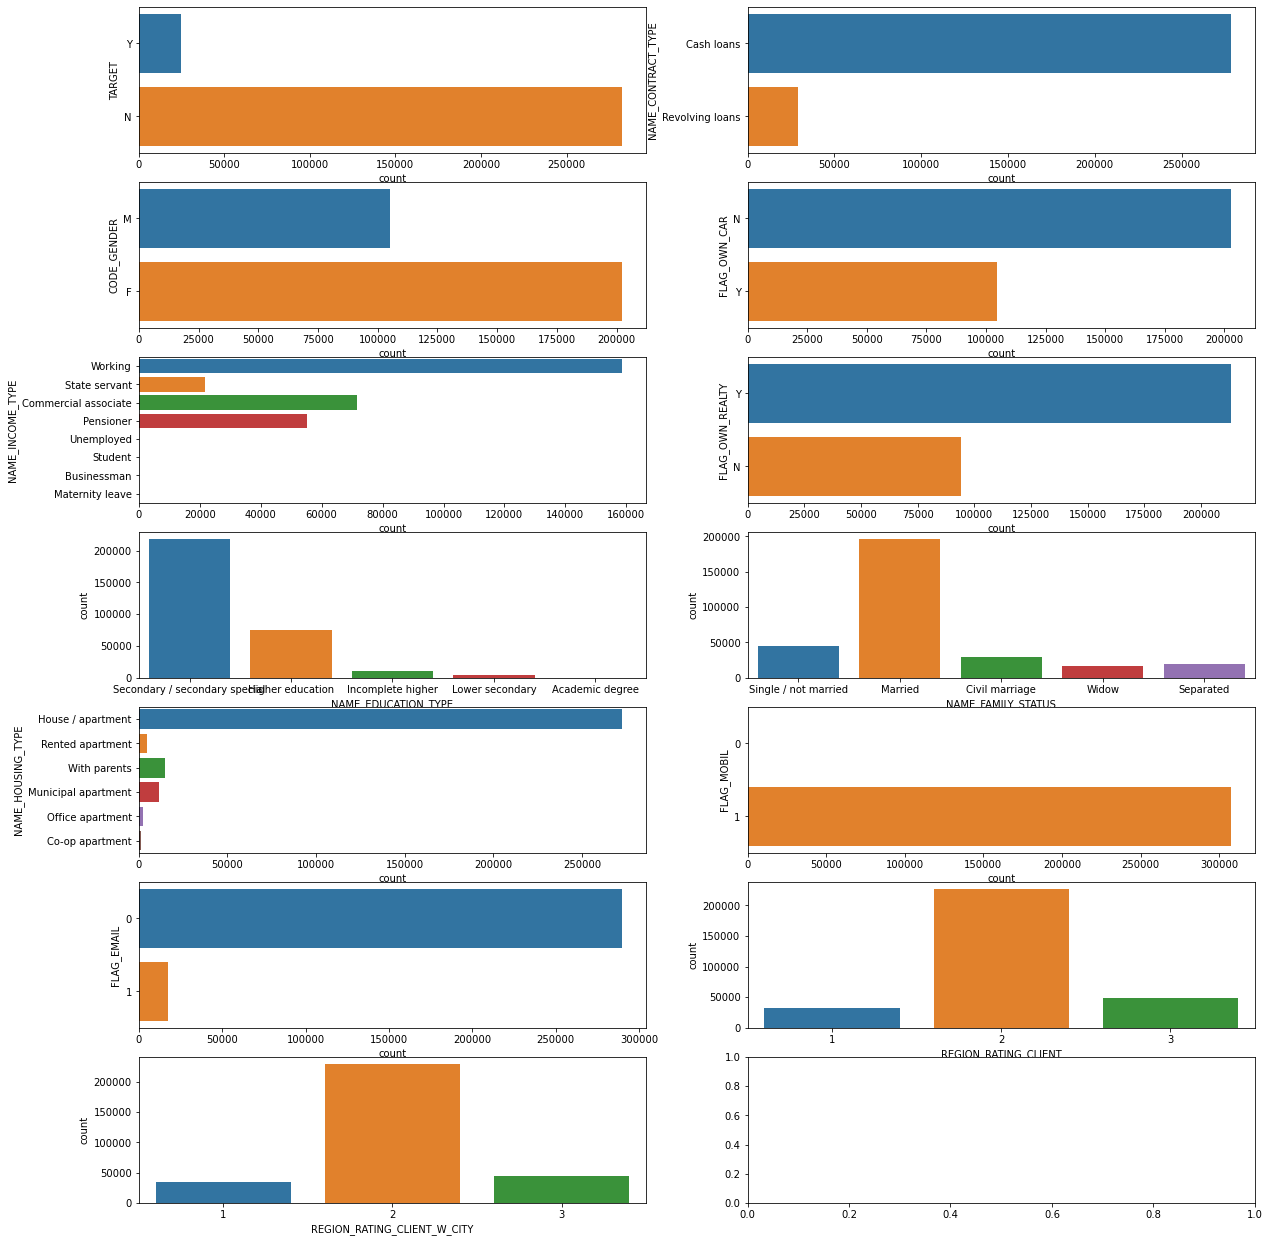

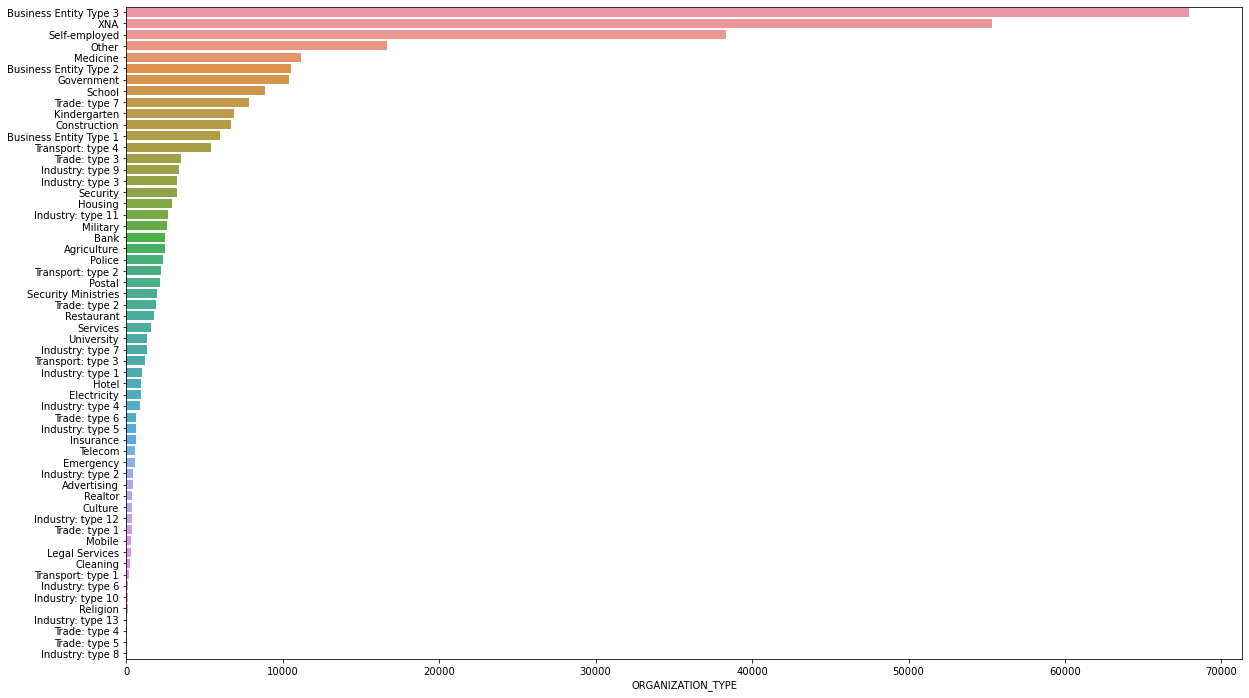

In [43]:
plt.figure(figsize = (30, 25))
plt.subplots_adjust(left=0,
                    bottom=0.05,
                    right=0.6,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

fig, axes = plt.subplots(7, 2, figsize=(20, 22))

sns.countplot(y = df.TARGET,
               ax = axes[0, 0])
# axes[0, 0].set_title("Target")

sns.countplot(y = df["NAME_CONTRACT_TYPE"],
            ax = axes[0, 1])

sns.countplot(y = df["CODE_GENDER"],
            ax = axes[1, 0])

sns.countplot(y = df.FLAG_OWN_CAR,
                 ax = axes[1, 1])

sns.countplot(y = df.NAME_INCOME_TYPE,
             ax = axes[2, 0])

sns.countplot(y = df.FLAG_OWN_REALTY,
              ax = axes[2, 1])

sns.countplot(x = df.NAME_EDUCATION_TYPE,
              ax = axes[3, 0])

sns.countplot(x = df.NAME_FAMILY_STATUS, 
              ax = axes[3, 1])

sns.countplot(y = df.NAME_HOUSING_TYPE, 
              ax = axes[4, 0])

sns.countplot(y = df.FLAG_MOBIL, 
              ax = axes[4, 1])

sns.countplot(y = df.FLAG_EMAIL, 
              ax = axes[5, 0])

sns.countplot(x = df.REGION_RATING_CLIENT, 
              ax = axes[5, 1])

sns.countplot(x = df.REGION_RATING_CLIENT_W_CITY, 
              ax = axes[6, 0])

fig, axes = plt.subplots(1, 1, figsize=(20, 12))

sns.barplot(y = df.ORGANIZATION_TYPE.value_counts().index,
           x = df.ORGANIZATION_TYPE.value_counts())

plt.show()

- **Target**: A significant proportion of customers do not respond.
- **Contract Type**: There is a high demand for cash loans compared to revolving loans.
- **Gender**: Females show a greater interest in credit offers.
- **Owning a Car**: Nearly half of our customers possess a car.
- **Employment Status**: Individuals who are employed show a preference for cashing out loans. Surprisingly, pensioners also have a high tendency to cash out loans, as compared to businessmen.
- **Ownership of Realty**: Approximately 50% of our customers do not own their own housing; instead, they may rent or have other arrangements.
- **Education Type**: Customers with secondary or secondary special education backgrounds frequently seek loans.
- **Marital Status**: Married individuals are more likely to avail themselves of loans.
- **Housing Type**: Customers who have their own homes or apartments often apply for loans.
- **Ownership of Mobile Phone**: Only a small number of customers do not own a mobile phone.
- **Email**: A very small percentage of customers do not have a registered email address.
- **Region Rating**: Customers residing in Tier 2 regions are more likely to seek loans.
- **City Rating**: Tier 2 cities have aspirations for progress and greater opportunities, leading to a higher demand for loans.
- **Number of Family Members**: A significant percentage of our customers have two members in their family.
- **Number of Children**: A large proportion of our customers do not have any children.



In [44]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion


## Analyzing the Continious Data:

In [45]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307217.000000,307217.000000,3.072170e+05,3.072170e+05,307217.000000,3.072170e+05,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000
mean,278171.739591,0.416972,1.688323e+05,5.993189e+05,27120.545473,5.383989e+05,-16038.819388,63851.979829,0.999997,0.056712,2.152619,2.052452,2.031496
std,102788.415252,0.722044,2.372214e+05,4.025214e+05,14492.167839,3.694492e+05,4363.846485,141306.625682,0.001804,0.231293,0.910621,0.509086,0.502789
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,189142.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,-19684.000000,-2760.000000,1.000000,0.000000,2.000000,2.000000,2.000000
50%,278195.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,-15753.000000,-1213.000000,1.000000,0.000000,2.000000,2.000000,2.000000
75%,367127.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12415.000000,-289.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,1.000000,1.000000,20.000000,3.000000,3.000000


In [46]:
df['Age'] = -(df.DAYS_BIRTH)/365

In [47]:
df.Age = df.Age.astype(int)

In [48]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,Age
count,307217.000000,307217.000000,3.072170e+05,3.072170e+05,307217.000000,3.072170e+05,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000
mean,278171.739591,0.416972,1.688323e+05,5.993189e+05,27120.545473,5.383989e+05,-16038.819388,63851.979829,0.999997,0.056712,2.152619,2.052452,2.031496,43.440933
std,102788.415252,0.722044,2.372214e+05,4.025214e+05,14492.167839,3.694492e+05,4363.846485,141306.625682,0.001804,0.231293,0.910621,0.509086,0.502789,11.954220
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000
25%,189142.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,-19684.000000,-2760.000000,1.000000,0.000000,2.000000,2.000000,2.000000,34.000000
50%,278195.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,-15753.000000,-1213.000000,1.000000,0.000000,2.000000,2.000000,2.000000,43.000000
75%,367127.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12415.000000,-289.000000,1.000000,0.000000,3.000000,2.000000,2.000000,53.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,1.000000,1.000000,20.000000,3.000000,3.000000,69.000000


<Figure size 2160x1800 with 0 Axes>

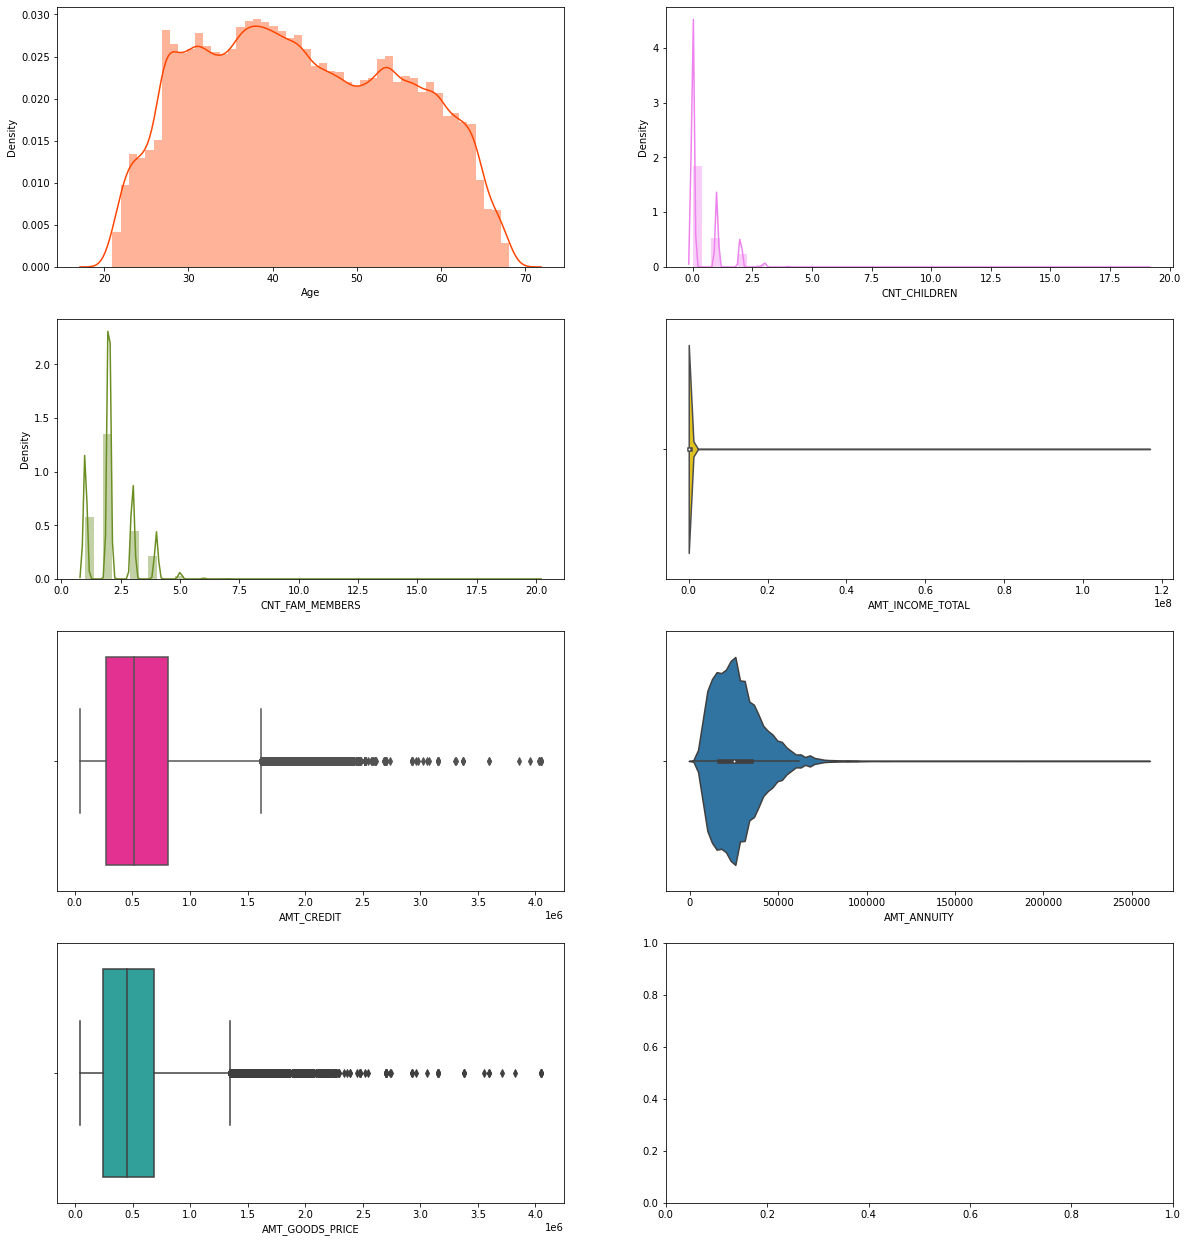

In [49]:
plt.figure(figsize = (30, 25))
plt.subplots_adjust(left=0,
                    bottom=0.05,
                    right=0.6,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

fig, axes = plt.subplots(4, 2, figsize=(20, 22))

sns.distplot(df.Age,color = 'orangered',
              ax = axes[0, 0])

sns.distplot(df.CNT_CHILDREN, color = 'violet',
               ax = axes[0, 1])

sns.distplot(df.CNT_FAM_MEMBERS, color = 'olivedrab',
              ax = axes[1, 0])

sns.violinplot( x = df["AMT_INCOME_TOTAL"], color = 'gold',
            ax = axes[1, 1])

sns.boxplot(x = df["AMT_CREDIT"], color = 'deeppink',
            ax = axes[2, 0])

sns.violinplot( x =  df.AMT_ANNUITY,
                 ax = axes[2, 1])

sns.boxplot(x = df.AMT_GOODS_PRICE, color = 'lightseagreen',
             ax = axes[3, 0])



plt.show()

## Visualising for whole dataset

In [50]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3,25
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government,52
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3,52
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion,54


In [51]:
df['Years_Employed'] = round(round(-(df.DAYS_EMPLOYED/365), 1))

In [52]:
df['Years_Employed'] = df['Years_Employed'].astype('int')

In [53]:
df.select_dtypes(['int32','int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307217 non-null  int64  
 1   CNT_CHILDREN                 307217 non-null  int64  
 2   AMT_INCOME_TOTAL             307217 non-null  float64
 3   AMT_CREDIT                   307217 non-null  float64
 4   AMT_ANNUITY                  307217 non-null  float64
 5   AMT_GOODS_PRICE              307217 non-null  float64
 6   DAYS_BIRTH                   307217 non-null  int64  
 7   DAYS_EMPLOYED                307217 non-null  int64  
 8   FLAG_MOBIL                   307217 non-null  int64  
 9   FLAG_EMAIL                   307217 non-null  int64  
 10  CNT_FAM_MEMBERS              307217 non-null  float64
 11  REGION_RATING_CLIENT         307217 non-null  int64  
 12  REGION_RATING_CLIENT_W_CITY  307217 non-null  int64  
 13 

In [54]:
df.Years_Employed = df.Years_Employed.apply(lambda x: -(x) if x<0 else x)

In [55]:
df.Years_Employed.describe()

count    307217.000000
mean        185.701631
std         382.252406
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: Years_Employed, dtype: float64

It looks like some person has been employed for 1001 years, lets check

<AxesSubplot:xlabel='Years_Employed'>

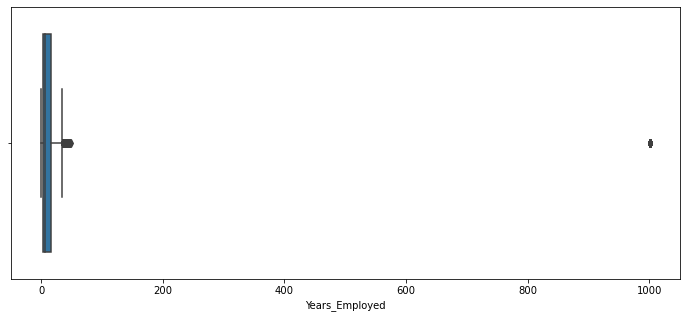

In [56]:
plt.figure(figsize = (12, 5))
sns.boxplot(df.Years_Employed)

In [57]:
df[df.Years_Employed == df.Years_Employed.max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed
8,100011,N,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,1,0,2.0,2,2,XNA,55,1001
11,100015,N,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,1,0,2.0,2,2,XNA,55,1001
23,100027,N,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,1,0,2.0,3,3,XNA,68,1001
38,100045,N,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,1,0,2.0,2,2,XNA,65,1001
43,100050,N,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Pensioner,Higher education,Single / not married,House / apartment,-23548,365243,1,0,1.0,2,2,XNA,64,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,N,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22414,365243,1,0,1.0,2,2,XNA,61,1001
307483,456227,N,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-24911,365243,1,0,1.0,2,2,XNA,68,1001
307487,456231,N,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,1,0,2.0,2,2,XNA,63,1001
307505,456249,N,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,1,0,1.0,2,2,XNA,66,1001


In [58]:
df[df.Age<df.Years_Employed]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed
8,100011,N,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,1,0,2.0,2,2,XNA,55,1001
11,100015,N,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,1,0,2.0,2,2,XNA,55,1001
23,100027,N,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,1,0,2.0,3,3,XNA,68,1001
38,100045,N,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,1,0,2.0,2,2,XNA,65,1001
43,100050,N,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Pensioner,Higher education,Single / not married,House / apartment,-23548,365243,1,0,1.0,2,2,XNA,64,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,N,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22414,365243,1,0,1.0,2,2,XNA,61,1001
307483,456227,N,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-24911,365243,1,0,1.0,2,2,XNA,68,1001
307487,456231,N,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,1,0,2.0,2,2,XNA,63,1001
307505,456249,N,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,1,0,1.0,2,2,XNA,66,1001


So ther are 55352, where person has worked more than their age before opting for a loan, hence as this is incorrect data so we can delete these records.

In [59]:
df = df[~(df.Age<df.Years_Employed)]

In [60]:
df.shape

(251865, 25)

In [61]:
df.head().reset_index(inplace = True)

In [62]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,Age,Years_Employed
0,100002,Y,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,2,2,Business Entity Type 3,25,2
1,100003,N,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,1,1,School,45,3
2,100004,N,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,2,2,Government,52,1
3,100006,N,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,2,2,Business Entity Type 3,52,8
4,100007,N,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,2,2,Religion,54,8


<AxesSubplot:xlabel='Years_Employed'>

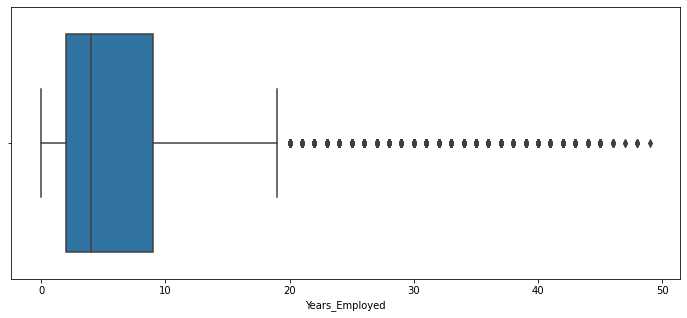

In [63]:
plt.figure(figsize = (12, 5))
sns.boxplot(df.Years_Employed)

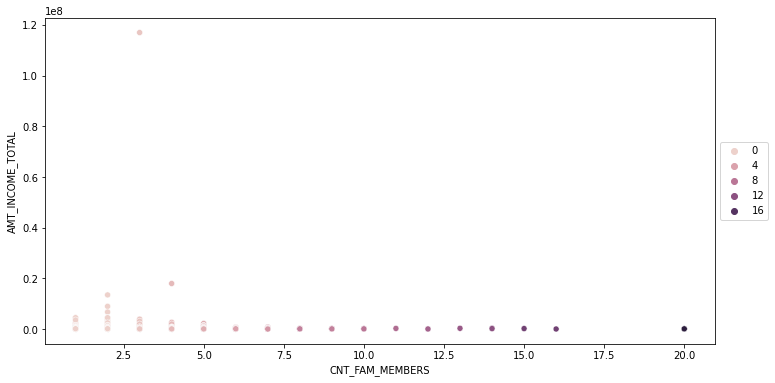

In [64]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df.CNT_FAM_MEMBERS, df.AMT_INCOME_TOTAL, hue = df.CNT_CHILDREN)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 864x432 with 0 Axes>

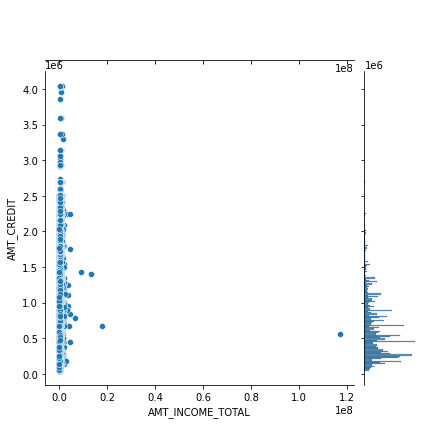

In [65]:
plt.figure(figsize = (12, 6))
sns.jointplot(x = df.AMT_INCOME_TOTAL,
             y = df.AMT_CREDIT)
plt.show()

<Figure size 720x504 with 0 Axes>

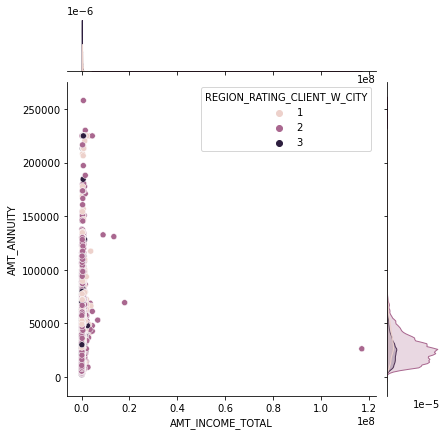

In [66]:
plt.figure(figsize = (10, 7))
sns.jointplot(y = df.AMT_ANNUITY, 
              x = df.AMT_INCOME_TOTAL, 
              hue = df.REGION_RATING_CLIENT_W_CITY)

plt.show()

<Figure size 720x504 with 0 Axes>

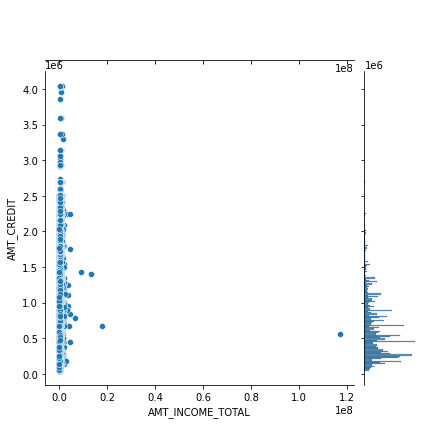

In [67]:
plt.figure(figsize = (10, 7))
sns.jointplot(df.AMT_INCOME_TOTAL, df.AMT_CREDIT)

plt.show()

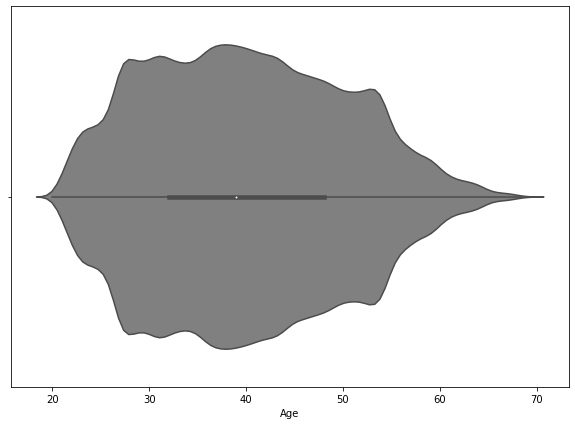

In [68]:
plt.figure(figsize = (10, 7))
sns.violinplot(df.Age, color=".5")

plt.show()

In [70]:
df.to_csv('appl_df.csv')